In [51]:
import numpy as np 
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.spatial import distance
import math

# 1. Local Outlier Factor
This first part of the assignment will consist of implementing the LOF from the ground up.

First, we need a dataset to work with, which is created below. 

In [52]:
data, labels = make_blobs(n_samples=[100, 100, 2],random_state=42)

## Task: Understand the dataset
1. Shortly describe the dataset, and what you would expect the LOF to be of the different datapoints

## Answer
- Write your answers here.


There are two clusters with practically the same density. Each clustaer has clear center and several outliers

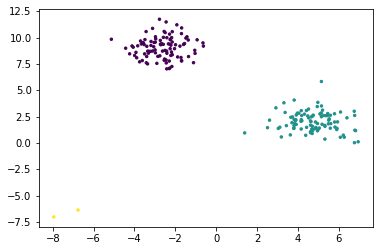

In [53]:
plt.scatter(data[:,0], data[:,1], c=labels, s=6)

## Task: implement the Local Outlier Factor
- Below are the signatures of all functions necessary for the Local Outlier Factor. Complete the implementations to fully implement the LOF.

In [54]:
def dist(x, y):
    """
    :x: point in the dataset, np.array
    :y: point in the dataset, np.array
    """
    # return  distance.euclidean(x, y)
    return  math.dist(x, y)

In [55]:
def k_dist(k, o, D):
    """
    :k: hyperparameter k of LOF
    :o: datapoint, np.array
    :D: complete dataset, np.array
    """
    array_dist = np.array([])
    for i in range(len(D)):
      distance = dist(o, D[i])
      array_dist = np.append(array_dist, distance)

    array_dist = np.sort(array_dist)
    return array_dist[k]

In [56]:
def N_k(k, o, D):
    """
    :k: hyperparameter k of LOF
    :o: datapoint, np.array
    :D: complete dataset, np.array
    """
    distance_K = k_dist(k, o, D)
    array_dist = np.array([])
    our_points_numbers = []
    for i in range(len(D)):
      if dist(o, D[i]) <= distance_K:
        if (D[i] != o).any():
          array_dist = np.append(array_dist, dist(o, D[i]))
          our_points_numbers.append(i)

    

    return [D[i] for i in our_points_numbers] 

In [57]:
def reach_dist(k, x, o, D):
    """
    :k: hyperparameter k of LOF
    :x: datapoint, np.array
    :o: datapoint, np.array
    :D: dataset, np.array
    """
    distance_K = k_dist(k, o, D)
    distance = dist(x, o)
    return np.maximum(distance_K, distance)

In [58]:
def lrd(k, o, D): #second try
    """
    :k: hyperparameter k of LOF
    :o: datapoint, np.array
    :D: dataset, np.array
    """
    neighbors = N_k(k, o, D)
    lrd_value = []
    for p in neighbors:
        p_reach_dist = reach_dist(k, o, p, D)
        lrd_value.append(p_reach_dist)
    if lrd_value == 0:
        return float('inf')
    return len(neighbors) / sum(lrd_value)


In [59]:
def lof(k, o, D): # second try
    """
    :k: hyperparameter k of LOF
    :o: datapoint, np.array
    :D: dataset, np.array
    """
    neighbors = N_k(k, o, D)
    lof_value = 0
    for p in neighbors:
        p_lrd = lrd(k, p, D)
        o_lrd = lrd(k, o, D)
        lof_value += p_lrd / o_lrd
    return lof_value / len(neighbors)

### Below is some helper code so you can compare your results with the LOF of the popular library scikit-learn

In [60]:
from sklearn.neighbors import LocalOutlierFactor

In [61]:
# it should work for all values of k of course
k = 5

In [62]:
my_lof_scores = np.array([lof(k, o, data) for o in data])
print(my_lof_scores[:10])

[1.03854434 1.03759892 0.94794951 1.09736105 0.98664123 1.74905378
 1.03064327 1.04210801 2.1033075  0.9904549 ]


In [63]:
sk_lof = LocalOutlierFactor(n_neighbors=k)
sk_lof.fit_predict(data)
sk_lof_scores = np.negative(sk_lof.negative_outlier_factor_)
print(sk_lof_scores[:10])

[1.03854434 1.03759892 0.94794951 1.09736105 0.98664123 1.74905378
 1.03064327 1.04210801 2.1033075  0.9904549 ]


In [70]:
my_lof_scores

array([ 1.03854434,  1.03759892,  0.94794951,  1.09736105,  0.98664123,
        1.74905378,  1.03064327,  1.04210801,  2.1033075 ,  0.9904549 ,
        1.08405434,  1.06911007,  1.20690804,  1.01427833,  1.1503974 ,
        1.08021418,  1.21297217, 10.97385108,  1.16999306,  1.16596947,
        1.27726037,  1.02682042,  1.11057155,  1.24913594,  1.24288668,
        1.68891911,  1.24252907,  3.2560118 ,  0.9751626 ,  1.07680526,
        1.00777373,  1.05600143,  2.75193139,  0.96693955,  1.04023598,
        1.13573908,  0.99776256,  1.07266163,  1.10929486,  1.06338965,
        1.06107012,  1.02066953,  1.43530477,  0.96858783,  1.30107668,
        1.01083739,  1.10772271,  1.01038793,  0.95912194,  1.02493685,
        1.14130751,  0.97601976,  0.99920395,  1.05906025,  1.02883493,
        1.1271333 ,  1.68663616,  1.31599038,  1.0302527 ,  1.03650834,
        1.10645428,  0.99455739,  1.09894687,  1.28178734,  1.07224195,
        1.00777787,  1.35805664,  1.05902296,  0.97458618,  0.96

In [146]:
sk_lof_scores

array([ 1.03854434,  1.03759892,  0.94794951,  1.09736105,  0.98664123,
        1.74905378,  1.03064327,  1.04210801,  2.1033075 ,  0.9904549 ,
        1.08405434,  1.06911007,  1.20690804,  1.01427833,  1.1503974 ,
        1.08021418,  1.21297217, 10.97385108,  1.16999306,  1.16596947,
        1.27726037,  1.02682042,  1.11057155,  1.24913594,  1.24288668,
        1.68891911,  1.24252907,  3.2560118 ,  0.9751626 ,  1.07680526,
        1.00777373,  1.05600143,  2.75193139,  0.96693955,  1.04023598,
        1.13573908,  0.99776256,  1.07266163,  1.10929486,  1.06338965,
        1.06107012,  1.02066953,  1.43530477,  0.96858783,  1.30107668,
        1.01083739,  1.10772271,  1.01038793,  0.95912194,  1.02493685,
        1.14130751,  0.97601976,  0.99920395,  1.05906025,  1.02883493,
        1.1271333 ,  1.68663616,  1.31599038,  1.0302527 ,  1.03650834,
        1.10645428,  0.99455739,  1.09894687,  1.28178734,  1.07224195,
        1.00777787,  1.35805664,  1.05902296,  0.97458618,  0.96

In [145]:
# the real test: check if the LOF scores are the same
np.allclose(my_lof_scores, sk_lof_scores, rtol=0, atol=1e-8)

True

## Visualizing your LOF.
Below is your LOF calculation visualized for the dataset.

2. Is this what you expected for the LOF scores?
3. Describe in text / figures which points you consider anomalies and why?

## Answer
- Write your answers here.


Yes, it is what i expected from LOF scores. I consider as anomalies points which have lof score higher than 2. There are sevaral points with scores 2.10, 2.75, 3.25, 10.28 and 10.97, which i consider as anomalies because of the big lof value. It means that these points are quite far from other points, so they could be anomalies

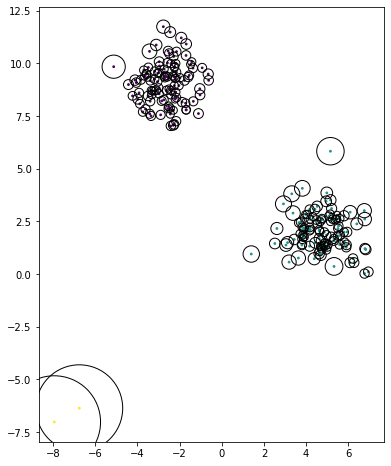

In [69]:
f, ax = plt.subplots(figsize=(14, 8))
ax.scatter(data[:,0], data[:,1], c=labels, s=3)
ax.set_aspect(1)
for i in range(len(my_lof_scores)):
    ax.add_artist(plt.Circle(tuple(data[i]), my_lof_scores[i] / 5 , fill = False))

# 2. Isolation Forest
Next we will implement the Isolation Forest.

Again, we will use a dataset, which is created below.

In [71]:
rng = np.random.default_rng(seed=42)

# data to build forest on
data = rng.normal(loc=[2, 5, 2, 5], scale=2, size=[400, 4])
outliers = rng.normal(loc=[2, 0, 2, 0], scale=2, size=[10, 4])

# data to test with
testdata = np.vstack((rng.normal(loc=[2, 5, 2, 5], scale=2, size=[200, 4]), 
                     rng.normal(loc=[2, 0, 2, 0], scale=2, size=[20, 4])))

In [72]:
data.shape

(400, 4)

In [73]:
outliers.shape

(10, 4)

## Implementing
Below is some skeleton code which is left for you to implement the isolation forest

In [74]:
import numpy as np
import random


class iTree:
    def __init__(self, D, e, l):
        """
        Constructs an isolation tree given the input parameters:
        
        :D: is the dataset
        :e: is the current path length
        :l: is the maximum path length
        """
        self.D = D
        self.e = e
        self.l = l
        self.n = D.shape[0]
        self.q = D.shape[1]
        
        if e >= l or self.n <= 1:
            self.external = True
            self.size = self.n
            return
        
        q = random.randint(0, self.q - 1)
        p = random.uniform(np.min(self.D[:, q]), np.max(self.D[:, q]))
        
        D_left = self.D[self.D[:, q] < p]
        D_right = self.D[self.D[:, q] >= p]
        self.left = iTree(D_left, e + 1, self.l)
        self.right = iTree(D_right, e + 1, self.l)
        self.external = False
        self.size = self.left.size + self.right.size
        self.p = p

    def test(self, o, pl=0):
        """
        Test the datapoint :o: against this tree, returns the path length
        """
        if self.external:
            return pl + self.e
        # print(o.T.shape)
        # print(o)
        # print(self.p)

        if o[self.q -1] < self.p:
            return self.left.test(o, pl + 1)
        else:
            return self.right.test(o, pl + 1)

In [75]:
class iForest:
    def __init__(self, D, t, phi):
        """
        Constructs an Isolation Forest given the input parameters:
        
        :D: the dataset
        :t: number of isolation trees
        :phi: size of subset to take from D
        """
        self.t = t
        self.phi = phi
        self.trees = []
        n = D.shape[0]
        
        for i in range(t):
            idx = np.random.choice(n, size=phi, replace=False)
            D_sub = D[idx, :]
            
            tree = iTree(D_sub, 0, np.ceil(np.log2(phi)))
            self.trees.append(tree)
    
    def test(self, o):
        """
        Tests the given datapoint :o: on the isolation trees and returns the average path length.
        """
        path_lengths = np.array([tree.test(o) for tree in self.trees])
        return np.mean(path_lengths)


In [76]:
forest = iForest(data, t=100, phi=256)

In [77]:
path_lengths = np.array([forest.test(o) for o in testdata])

In [78]:
len(path_lengths)

220

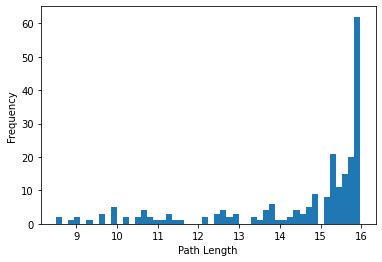

In [79]:
import matplotlib.pyplot as plt
plt.hist(path_lengths, bins=50)
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.show()

## Tainted vs. Untainted Datasets
- Build the isolation forest on both the untainted and the tainted dataset (for the tainted dataset just combine the data and outliers, don't use the test data)
- Plot the ROC curves for both isolation forests. See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html for a function to calculate the ROC curve. Note that we take anomalies as the positive class.
1. Does it significantly affect the performance of the isolation forest? Shortly explain why it does or it doesn't.
2. A nice property of the isolation forest is that we can use subsampling without degradation in performance. How does subsampling help with masking?

## Answer
- Write your answers here.

Yes, it does significantly affect the performance of the isolation forest. We can see that curve of untained dataset is closer to left top corner. Integral of untained curve is bigger than integral of untainted curve.

Subsampling in isolation forest can help with masking by reducing the influence of outliers and making the model more robust to incomplete or noisy data, thereby improving the model's performance on masked datasets.



In [80]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

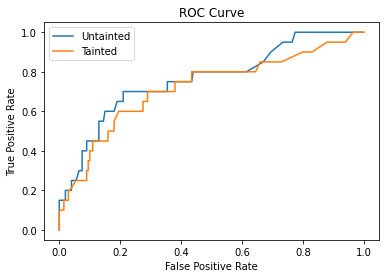

In [81]:
tainted_data = np.vstack((data, outliers))

untainted_forest = iForest(data, 100, 256)
tainted_forest = iForest(tainted_data, 100, 256)

untainted_scores = np.array([untainted_forest.test(x) for x in testdata])
tainted_scores = np.array([tainted_forest.test(x) for x in testdata])

labels = np.zeros(testdata.shape[0])
labels[200:] = 1

fpr_untainted, tpr_untainted, _ = roc_curve(labels, -untainted_scores)
fpr_tainted, tpr_tainted, _ = roc_curve(labels, -tainted_scores)

plt.plot(fpr_untainted, tpr_untainted, label='Untainted')
plt.plot(fpr_tainted, tpr_tainted, label='Tainted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Task: Understanding the hyperparameters
3. Play around with the hyperparameters. How small / large can you subsample before your performance starts to decrease? Why? How many trees do you need in the forest?

## Answer
- Write your answers here.

The optimal subsample size and number of trees in an isolation forest depend on the dataset and the desired performance. Generally, smaller subsample sizes may require more trees to achieve good performance, while larger subsample sizes may not require as many trees.
Here i used 100 trees for this model.

While using 200 trees, we can see that untainted curse in much closer to top left corner. It means that model could predict True positive values much better.

When we have 50 trees, results become less good. We can see that tainted curve practically every time shows better perfomance than untainted.

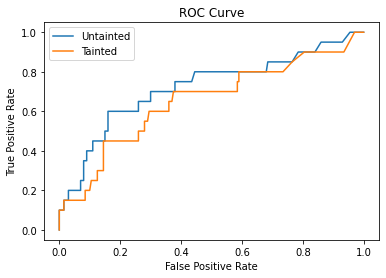

In [82]:
tainted_data = np.vstack((data, outliers))

untainted_forest = iForest(data, 200, 256)
tainted_forest = iForest(tainted_data, 200, 256)

untainted_scores = np.array([untainted_forest.test(x) for x in testdata])
tainted_scores = np.array([tainted_forest.test(x) for x in testdata])

labels = np.zeros(testdata.shape[0])
labels[200:] = 1

fpr_untainted, tpr_untainted, _ = roc_curve(labels, -untainted_scores)
fpr_tainted, tpr_tainted, _ = roc_curve(labels, -tainted_scores)

plt.plot(fpr_untainted, tpr_untainted, label='Untainted')
plt.plot(fpr_tainted, tpr_tainted, label='Tainted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


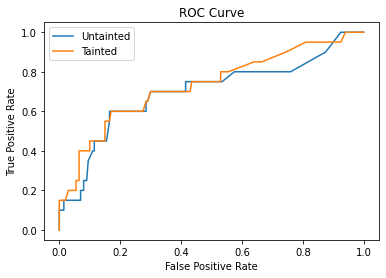

In [83]:
tainted_data = np.vstack((data, outliers))

untainted_forest = iForest(data, 50, 256)
tainted_forest = iForest(tainted_data, 50, 256)

untainted_scores = np.array([untainted_forest.test(x) for x in testdata])
tainted_scores = np.array([tainted_forest.test(x) for x in testdata])

labels = np.zeros(testdata.shape[0])
labels[200:] = 1

fpr_untainted, tpr_untainted, _ = roc_curve(labels, -untainted_scores)
fpr_tainted, tpr_tainted, _ = roc_curve(labels, -tainted_scores)

plt.plot(fpr_untainted, tpr_untainted, label='Untainted')
plt.plot(fpr_tainted, tpr_tainted, label='Tainted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Task: Building a detector
We now have an isolation forest which can give a measure of anomalousness for a given datapoint. But how are we going to use it to detect anomalies?

4. Using a threshold, create a detector which given a datapoint indicates whether it is anomalous or not. It should return a 1 if it is an anomaly, and a 0 if it is normal data.
    - NOTE: Motivate why you choose your threshold using metrics
    
## Answer
- Write your answers here.

I used value 15.9 as threshold, because in that situation there are not a lot of anomalies. Total amount of anomalies should not be very big, overwise there are not anomalies but nirmal data

In [85]:
def detect(datapoint, threshold):
    """
    Returns 1 if the given datapoint is an anomaly, 0 otherwise.
    """
    if datapoint < threshold:
      return 0
    else:
      return 1

In [86]:
untainted_scores = np.array([untainted_forest.test(x) for x in testdata])

In [87]:
untainted_scores

array([13.76, 10.76, 10.4 , 15.48, 15.4 ,  9.52, 15.48, 15.32, 15.28,
       15.84, 10.52, 15.32, 15.48, 15.  , 15.36, 13.16, 15.12, 13.6 ,
       15.4 , 15.8 ,  9.16, 15.88, 15.6 , 12.04, 15.36, 15.8 , 15.16,
       15.96, 13.96, 15.4 , 15.88, 12.16, 15.4 , 15.  , 10.08, 15.88,
       15.44, 15.48, 15.92, 15.92, 15.96, 15.48, 14.48, 15.96, 15.8 ,
       13.76, 10.08, 15.4 , 15.44, 15.96, 15.72, 15.84, 15.28, 15.88,
       15.8 , 11.44, 13.32, 15.84, 15.04, 15.32, 15.44, 15.32, 15.84,
       15.88, 15.84, 15.72, 15.44, 14.36, 10.72, 15.72, 10.76, 15.88,
       15.96,  9.88, 16.  , 14.04, 15.96, 15.2 , 15.88, 15.8 , 15.8 ,
       15.76, 15.88, 12.76, 14.48, 15.8 , 15.88, 14.24, 15.  ,  8.84,
       15.32, 15.84,  9.52, 15.44, 14.48, 15.72, 12.24, 15.92, 13.  ,
       15.  , 15.88, 14.4 , 15.84, 13.96, 15.84, 15.08, 15.6 , 15.72,
       15.88, 15.96, 15.44, 15.96, 13.96, 12.68, 10.08, 12.68, 15.88,
       14.4 , 15.8 , 12.68, 15.4 , 15.88,  8.64, 15.92, 10.4 , 15.  ,
       11.84, 13.  ,

In [129]:
# results_dict = {}
results_list = []
threshold = 15.9
for i in range(len(untainted_scores)):
  value = detect(untainted_scores[i], threshold)
  # results_dict[i] = value
  results_list.append(value)

In [147]:
results_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

## Task: Evaluate
Now we want to evaluate the performance of your detector.
- Calculate the True Positive Rate, False Positive Rate, and Precision for your detector based on the output of the confusion matrix. See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix for how to use the function, and see https://en.wikipedia.org/wiki/Confusion_matrix for how to calculate the metrics.
   - NOTE: do NOT use some other convenience function from sklearn or elsewhere to calculate these metrics. These may only be used to validate your metrics.

5. Are you happy with the performance of the model? Why or why not?

## Answer
- Write your answers here.

No, i am not happy with the perfomance because of the results. There are 193 False negative values, it is not really good. We have only 27 True positive values

In [132]:
from sklearn.metrics import confusion_matrix



# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(np.ones(len(testdata)), results_list).ravel()

print(f'True negative - {tn}')
print(f'False positive - {fp}')
print(f'False negative - {fn}')
print(f'True positive - {tp}')


True negative - 0
False positive - 0
False negative - 193
True positive - 27


# 3. Machine Learning for Temporal Anomaly Detection
We will now look at the case of temporal data. For temporal data, it is possible to use any conventional Machine Learning model in order to perform anomaly detection. We start by creating a simple dataset below. We inject an anomaly towards the end of the dataset which will be included in the test dataset.

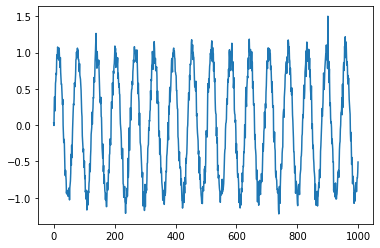

In [92]:
rng = np.random.default_rng(seed=42)
y = np.sin(np.arange(0, 100, 0.1)) + rng.normal(loc=0, scale=0.1, size=1000)
y[900] = 1.5
train = y[:800]
test = y[800:]
plt.plot(y)

In [93]:
len(train)

800

In [94]:
len(test)

200

## Question
I have created this simple dataset by using a sine function and adding some gaussian-distributed noise. 
1. Is this training dataset tainted or untainted? Explain why or why not.

## Answer
- Write your answers here.


The training dataset in this case is tainted, because the value of y[900] has been deliberately altered from the rest of the dataset

## Task: Set up the training
We will use a ML algorithm with a sliding window to try and predict the next value based on the last 24.
- transform the train and test datasets into appropriate shapes to train the model
- the model should take the last 24 datapoints (X) to predict the next datapoint (Y)

In [95]:
y[5]

0.3492075879179712

In [96]:
train[5]

0.3492075879179712

In [97]:
import numpy as np

def sliding_window(data, window_size):
    X = []
    Y = []
    for i in range(len(data)-window_size-1):
        X.append(data[i:i+window_size])
        Y.append(data[i+window_size])
    return np.array(X), np.array(Y)

window_size = 24

train_x, train_y = sliding_window(train, window_size)

test_x, test_y = sliding_window(test, window_size)


In [98]:
train_x[0]

array([ 0.03047171, -0.00416499,  0.27371445,  0.38957668,  0.19431482,
        0.34920759,  0.57742651,  0.61259343,  0.71567598,  0.69802252,
        0.92941078,  0.96898655,  0.93864216,  1.07628231,  1.03220066,
        0.91156574,  1.03644868,  0.89577655,  1.06169266,  0.9413075 ,
        0.89081119,  0.79511641,  0.93075054,  0.73025226])

In [99]:
train_y[0]

0.6326303983348399

In [100]:
train_x[1]

array([-0.00416499,  0.27371445,  0.38957668,  0.19431482,  0.34920759,
        0.57742651,  0.61259343,  0.71567598,  0.69802252,  0.92941078,
        0.96898655,  0.93864216,  1.07628231,  1.03220066,  0.91156574,
        1.03644868,  0.89577655,  1.06169266,  0.9413075 ,  0.89081119,
        0.79511641,  0.93075054,  0.73025226,  0.6326304 ])

In [ ]:
# train_x = None
# train_y = None
# test_x = None
# test_y = None

## Task: Train the model
Now that we have the datasets set up properly, we can train our model. Let's use a random forest regressor. 
- Train the random forest regressor on the train dataset
- Use the trained random forest regressor to make predictions on the test dataset

In [101]:
from sklearn.ensemble import RandomForestRegressor


regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(train_x, train_y)
predict = regr.predict(test_x)


## Task: Plot your predictions
Let's see visually how the model performs. 
- Plot the predictions of your model against the actual values.
2. Does your model perform well?
3. Do you think it matters for this set-up if the training dataset is tainted or untainted? Why?

## Answer
- Write your answers here.

Model can not predict outliers well, but we can see that curve of predicted valuea and curse of real values are often repeated.

I think that the major problem is that amount of data is not so big.

In [134]:
train_x.shape

(33, 24)

In [102]:
print(len(predict))
print(len(test_y))

175
175


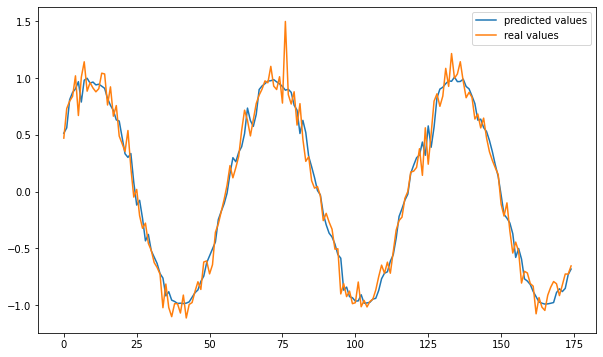

In [103]:
plt.figure(figsize=(10,6))
plt.plot(predict, label = 'predicted values')
plt.plot(test_y, label = 'real values')
plt.legend()
plt.show()

## Task: plot the prediction residual. 
To actually detect the anomalies, we need to calculate the residual. 
- Calculate the residual and plot it.
4. Does the residual look useful for detecting anomalies?
- Check if the injected anomaly can be detected using your residual score without giving any false positives

## Answer
- Write your answers here.


Residual looks useful for detecting anomalies.


Yes, we can detect this anomaly on residual value 

In [104]:
values_for_line = np.repeat(0.3, 175)

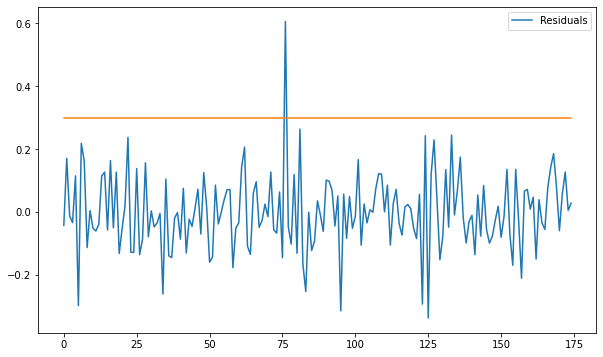

In [105]:
# Residual
residual = test_y - predict

plt.figure(figsize=(10,6))
plt.plot(residual, label = 'Residuals')
plt.plot(values_for_line)
plt.legend()
plt.show()

In [106]:
residual[residual>0.3] ## Yes, we can detect this anomaly on residual value 

array([0.60557938])

# 4. Autoencoder for Anomaly Detection
Lastly, we will use an autoencoder on the same temporal dataset to detect anomalies. Although we will use it now in a temporal setting, note that autoencoders can also be used to detect anomalies in non-temporal data.

In [107]:
import torch

## Task: Create train / test dataset
We will use the autoencoder slightly differently. Let's pretend that this dataset is the temperature at our nuclear reactor. We take a measurement every hour and we upload this data once per day to our server, at which point we use the autoencoder to detect anomalies.
- transform the train and test datasets into appropriate shapes to train the model
- the model should take a window of 24 datapoints and reconstruct it. The stride should be 24.

In [108]:
import numpy as np

window_size = 24
stride = 24

# Transform train data
train_x = []
for i in range(0, len(train)-window_size+1, stride):
    train_x.append(train[i:i+window_size])
train_x = np.array(train_x)

# Transform test data
test_x = []
for i in range(0, len(test)-window_size+1, stride):
    test_x.append(test[i:i+window_size])
test_x = np.array(test_x)


In [109]:
train_x.shape

(33, 24)

In [110]:
test_x.shape

(8, 24)

In [ ]:
# train_x = None
# test_x = None

## Task: Train the autoencoder
Below I have provided a simple autoencoder class which you can use.
- Use the MSE loss and the Adam optimizer to train an autoencoder on the training dataset you created.

In [136]:
class Autoencoder(torch.nn.Module):
    def __init__(self, latent_nodes):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(24, 15),
            torch.nn.ReLU(),
            torch.nn.Linear(15, 8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, latent_nodes)
        )
        
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(latent_nodes, 8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, 15),
            torch.nn.ReLU(),
            torch.nn.Linear(15, 24)
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [148]:
learning_rate = 0.01
model = Autoencoder(24)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [149]:
num_epochs = 100

train_x_tensor = torch.tensor(train_x, dtype=torch.float32)
test_x_tensor = torch.tensor(test_x, dtype=torch.float32)

train_loss_epochs = []
test_loss_epochs = []

n_epoch = 1
for epoch in range(num_epochs):
    model.train()
    
    train_outputs = model(train_x_tensor)
    train_loss = loss_fn(train_outputs, train_x_tensor)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    model.eval()
    
    with torch.no_grad():
        test_outputs = model(test_x_tensor)
        test_loss = loss_fn(test_outputs, test_x_tensor)

        train_loss_epochs.append(train_loss.detach().numpy())
        test_loss_epochs.append(test_loss)
    
    if n_epoch % 5 == 0:
      print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
    n_epoch += 1



Epoch [5/100], Train Loss: 0.5068, Test Loss: 0.5133
Epoch [10/100], Train Loss: 0.4453, Test Loss: 0.4378
Epoch [15/100], Train Loss: 0.3275, Test Loss: 0.3065
Epoch [20/100], Train Loss: 0.2010, Test Loss: 0.1783
Epoch [25/100], Train Loss: 0.1105, Test Loss: 0.0936
Epoch [30/100], Train Loss: 0.0526, Test Loss: 0.0494
Epoch [35/100], Train Loss: 0.0273, Test Loss: 0.0314
Epoch [40/100], Train Loss: 0.0189, Test Loss: 0.0182
Epoch [45/100], Train Loss: 0.0139, Test Loss: 0.0165
Epoch [50/100], Train Loss: 0.0123, Test Loss: 0.0152
Epoch [55/100], Train Loss: 0.0107, Test Loss: 0.0146
Epoch [60/100], Train Loss: 0.0099, Test Loss: 0.0135
Epoch [65/100], Train Loss: 0.0090, Test Loss: 0.0136
Epoch [70/100], Train Loss: 0.0087, Test Loss: 0.0132
Epoch [75/100], Train Loss: 0.0084, Test Loss: 0.0130
Epoch [80/100], Train Loss: 0.0082, Test Loss: 0.0128
Epoch [85/100], Train Loss: 0.0081, Test Loss: 0.0129
Epoch [90/100], Train Loss: 0.0080, Test Loss: 0.0127
Epoch [95/100], Train Loss: 0

In [150]:
iters = np.arange(0,100,1) 
print(f'len(train_loss_epochs) - {len(train_loss_epochs)}')
print(f'len(test_loss_epochs) - {len(test_loss_epochs)}')

len(train_loss_epochs) - 100
len(test_loss_epochs) - 100


Text(0, 0.5, 'MSE')

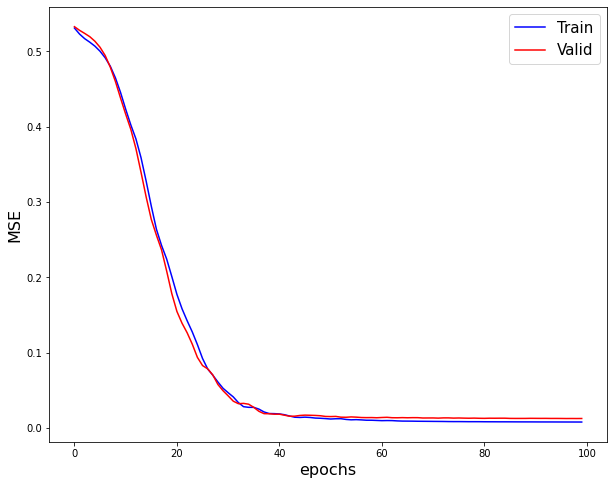

In [151]:
fig , ax = plt.subplots(figsize=(10, 8))
ax.plot(iters, train_loss_epochs, color='blue', label='Train')
ax.plot(iters, test_loss_epochs, color='red', label='Valid')

ax.legend(loc='best',prop={'size': 15})

ax.set_xlabel ("epochs", fontsize =16)
ax.set_ylabel ("MSE", fontsize =16)

## Task: Plotting
Once you have achieved a loss you are happy with (should be below or around 0.02), apply the autoencoder to the test dataset and plot the reconstructed data.
Next, plot the reconstruction error on the test dataset. 
1. Is the reconstruction error useful to detect the anomaly?
2. Which approach do you prefer for temporal data: to use ML to predict next values, or to use an autoencoder to reconstruct the data? Why?
3. There are a couple of hyperparameters which you had to figure out to train an accurate model (number of nodes in latent space, learning rate, number of epochs). Describe how the number of nodes in the autoencoder affects the performance of the model using plots.

## Answer
- Write your answers here.


I think reconstruction error is not always useful to detect anomaly. Can produce false positives or miss actual anomalies.

I more prefer autoencoders. Using an autoencoder to reconstruct the data can be better suited for identifying anomalies or detecting changes in the underlying patterns.

When i set more epochs for training, i got better result. For learning rate i can say that decreasing this parameter produced better result. Changing the number of nodes affects performance in that the rate and stability of error reduction will change. The smaller this parameter, the more randomly our error decreases from epoch to epoch.

In [116]:
model.eval()
with torch.no_grad():
    test_outputs = model(test_x_tensor)
    print(test_outputs)

tensor([[-9.5448e-01, -9.4884e-01, -9.9639e-01, -9.5145e-01, -9.1876e-01,
         -9.3821e-01, -9.7730e-01, -8.3212e-01, -7.1601e-01, -6.0284e-01,
         -6.6039e-01, -5.4325e-01, -4.6968e-01, -4.0842e-01, -2.8087e-01,
         -9.9253e-02, -6.9994e-02,  2.7817e-03,  6.7420e-02,  1.0290e-01,
          3.0338e-01,  4.0850e-01,  4.3992e-01,  4.5731e-01],
        [ 4.8871e-01,  6.1329e-01,  7.2528e-01,  8.5362e-01,  8.1383e-01,
          8.2707e-01,  8.4343e-01,  9.1308e-01,  1.0084e+00,  1.0351e+00,
          9.9369e-01,  9.9705e-01,  9.3715e-01,  9.7814e-01,  9.4338e-01,
          9.1957e-01,  8.1726e-01,  7.2507e-01,  7.4544e-01,  5.2470e-01,
          4.8177e-01,  4.3591e-01,  3.5152e-01,  2.5252e-01],
        [-7.2008e-04, -7.0378e-02, -1.7102e-01, -3.7176e-01, -4.0463e-01,
         -4.3220e-01, -5.3694e-01, -5.9095e-01, -7.6120e-01, -7.6822e-01,
         -8.3289e-01, -8.0860e-01, -9.3991e-01, -9.8752e-01, -1.0047e+00,
         -1.0194e+00, -1.0340e+00, -1.0410e+00, -9.9993e-01, -

In [117]:
len(test)

200

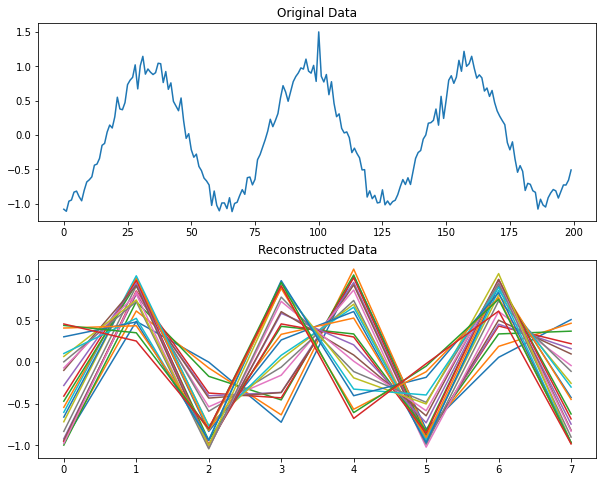

In [118]:
model.eval()

test_outputs = model(test_x_tensor)

test_outputs = test_outputs.detach().numpy()

# Plot reconstructed data
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
axs[0].plot(test[:200])
axs[0].set_title("Original Data")
axs[1].plot(test_outputs[:200])
axs[1].set_title("Reconstructed Data")
plt.show()


In [119]:
test_x.shape

(8, 24)

In [120]:
test_outputs.shape

(8, 24)

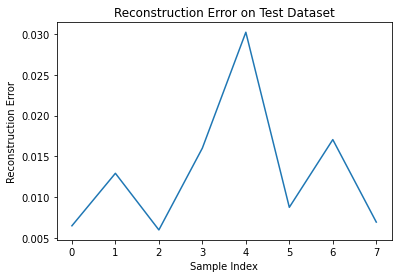

In [121]:
test_error = np.mean(np.square(test_x - test_outputs), axis=1)

fig, ax = plt.subplots()
ax.plot(test_error)
ax.set_title("Reconstruction Error on Test Dataset")
ax.set_xlabel("Sample Index")
ax.set_ylabel("Reconstruction Error")
plt.show()